<a href="https://colab.research.google.com/github/melou-slr/PFE-2019---MIR/blob/master/lastversion_preprocessing_SSMs%2Bmelspec_beatsync.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import scipy.io
import matplotlib.pyplot as plt
from matplotlib import patches

from PIL import Image
import pylab as pyl

import tensorflow as tf
import keras
import sklearn
import h5py
import shutil
import scipy
import cython
import mido
import pytest
import six
import librosa

import IPython.display

from pathlib import Path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Using TensorFlow backend.


In [0]:
pip install --upgrade librosa

Requirement already up-to-date: librosa in /usr/local/lib/python3.6/dist-packages (0.7.0)


In [0]:
!pip install madmom

In [0]:
import madmom
import librosa
import librosa.display

import os
os.chdir('/content/drive/My Drive/Colab Notebooks/')
!pwd
import os.path
from os import path

/content/drive/My Drive/Colab Notebooks


In [0]:
#ID of SALAMI files for train set

idSALAMITrain = [1198,  1550,  126,  1246,  822,  250,  1168,  520,  694,  330,

574,  18,  200,  986,  482,  1606,  1222,  536,  722,  690,  1384,  998,  1464, 

1218,  396,  1318,  464,  1402,  438,  270,  976,  784,  264,  1556,  384,  

1594,  1292,  1468,  290,  40,  500,  338,  1630,  538,  552,  572,  1108,  

1654,  284,  1524,  888,  1414,  456,  1194,  1274,  1442,  502,  64,  904,  

288,  1508,  1600,  138,  988,  732,  674,  136,  1404,  160,  122,  704,  884,

1196,  1236,  686,  416,  1538,  468,  566,  766,  1294,  1588,  1144,  1346, 

1544,  718,  316,  606,  398,  1338,  706,  780,  1240,  1434,  1532,  592,  

530,  128,  496,  1642,  682,  426,  1620,  1202,  1266,  688,  1228,  1644,  

618,  1192,  1348,  576,  262,  1334,  906,  1234,  100,  1610,  192,  198,  

1176,  82,  968,  280,  514,  1438,  556,  840,  936,  1232,  1552,  590,  346, 

1092,  1256,  994,  124,  1094,  926,  1244,  908,  2,  952,  356,  344,  708, 

990,  1138,  1452,  458,  626,  432,  222,  1280,  684,  1558,  380,  470,  

322,  672,  452,  554,  48,  670,  668,  50,  1604,  216,  1472,  454,  792, 

734,  1652,  636,  424,  790,  1068,  754,  1368,  836,  1528,  616,  412,  

1382,  838,  638,  348,  1296,  1446,  634,  666,  1160,  1432,  1184,  778,  

38,  1122,  640,  1182,  578,  1114,  184,  370,  1536,  526,  1444,  158,  

1614,  324,  1518,  1208,  630,  1352,  1276,  298,  1622,  1356,  1372,  476,  

1640,  1180,  466,  644,  1522,  588,  656,  10,  844,  1358,  276,  1042,  46,  

892,  44,  1526,  1436,  870,  362,  562,  328,  996,  1400,  364,  692,  1200,  

876,  1162,  1448,  1204,  752,  542,  1336,  1324,  600,  368,  720,  214,  

336,  1106,  188,  414,  1392,  1548,  730,  1574,  1148,  698,  970,  1494,  6,  

120,  1370,  494,  800,  1496,  820,  1116,  700,  1510,  242,  1210,  1650,  98,  

340,  608,  1172,  612,  678,  212,  486,  1082,  236,  318,  1482,  8,  622,  

1580,  400,  1328,  1498,  1096,  1252,  736,  190,  164,  1270,  1216,  1312,  

1540,  1512,  436,  366,  140,  584,  480,  32,  1572,  24,  934,  58,  334,  

146,  1304,  632,  492,  920,  1220,  1376,  1278,  1504,  1350,  474,  798,  

326,  1612,  350,  1226,  1396,  1084,  1520,  1560,  402,  1188,  388,  958,  

978,  1360,  446,  662,  310,  546,  12,  1454,  258,  846,  450,  1578,  550,  

294,  296,  1456,  404,  1570,  896,  68,  354,  534,  710,  244,  30,  568,  

852,  132,  1380,  234,  570,  946,  748,  1166,  1422,  448,  1418,  1406, 

460,  1344,  1408,  162,  596,  770,  806,  862,  4,  410,  1310,  112,  34,  

964,  1460,  1608,  36,  1154,  1128,  726,  260,  676,  924,  1330,  1238,  

278,  648,  1628,  598,  1390,  1624,  528,  406,  1420,  750,  740,  1388,  

756,  1582,  916,  386,  1412,  272,  1300,  1074,  1530,  228,  488,  152,  

1394,  1584,  114,  828,  360,  582,  1374,  1514,  490,  1164,  498,  724,  

762,  108,  428,  714,  786,  1146,  186,  1286,  372,  782,  1150,  1470,  940,  

54,  808,  696,  358,  728,  1130] 



#ID of SALAMI files for validation set

idSALAMIVal =  [746,  382,  956,  788,  832,  716,  116,  1158,  1490,  768,  

166,  78,  312,  760,  1386,  900,  1254,  812,  814,  860,  1090,  378,  1132,  

646,  614,  540,  1308,  1516,  882,  742,  930,  22,  864,  1156,  484,  818,  

628,  110,  462,  1206,  866,  1362,  1428,  510,  826,  652,  420] 



 

#ID of SALAMI files for test set

idSALAMITest = [758, 1484, 342,  1070,  248,  624,  1072,  594,  794,  202,  

868,  702,  442,  1268,  1502,  434,  266,  796,  1088,  20,  654,  980,  856,  

1458,  922,  176,  544,  1134,  306,  1450,  352,  1288,  858,  910,  1186,  

418,  1566,  902,  1212,  1342,  1568,  142,  744,  1306,  1592,  1366,  1098,  

1364,  28,  1078,  1174,  1554,  660,  148,  1142,  1424,  880,  1230,  972,  

180,  156,  854,  1488,  320,  658,  210,  42,  1332,  444,  392,  1616,  1634,  

220,  274,  1354,  1314,  252,  1646,  1284,  1044,  1534,  1576,  950,  586,  

1224,  512,  532,  1100,  304,  558,  430,  314,  938,  1298,  1190,  1462,  

774,  816,  472,  1086,  16,  440,  928,  772,  824,  1636,  1080,  974,  1316,  

1260,  308,  1322,  848,  680,  394,  960,  268,  1480,  1648,  564,  914,  422,  

504,  232,  60,  712,  150,  602,  88,  94,  168,  580,  1478,  850,  1124, 

650,  170,  56,  1590,  1596,  1242,  204,  1626,  92,  738,  944,  1476,  86,  

1282,  1506,  72,  620,  130,  1562,  954,  932,  802,  1340,  506,  1264,  604,  

1250,  254,  1214,  286,  1104,  118,  898,  1102,  1492,  912,  1248,  942,  

408,  478,  26,  1262,  1474,  878,  834,  1542,  52,  810,  1632,  984,  664,  

154,  982,  1066,  548,  1326,  1118,  642,  1638,  894,  104,  1272,  992,  

218,  962,  776,  1564,  1598,  14,  1290,  842,  1120,  1416,  1618,  524,  

1076,  522,  282,  1170,  874,  1586,  516,  1602,  890,  1112,  830,  948,  

518,  332,  886,  1110,  1378,  508,  1546,  1302,  610,  206,  374,  1152,  

302,  1136]

In [0]:
def trouver_la_liste(beat_frames,annot_frames):
  
  i=0
  liste=[]
  

  
  for k in range (len(annot_frames)): 
    
    annot=annot_frames[k]
    
    while i<=len(beat_frames)-1 and beat_frames[i]<=annot:
      i=i+1
      
    if (i-1)<=len(beat_frames)-1  and  beat_frames[i-1]<=annot:
      liste.append(i-1)
      i=i+1
    else:
      i=i+1
 
  return(liste)

In [0]:
  i=idSALAMITest[0]
#for i in idSALAMITest:
  val=i
  F=100
    
  y,sr=librosa.load('/content/drive/My Drive/Colab Notebooks/PFE/SALAMI/'+str(i)+'.mp3')
  y_later_use=y
  proc = madmom.features.downbeats.DBNDownBeatTrackingProcessor(beats_per_bar=[3, 4], fps=100)
  act = madmom.features.downbeats.RNNDownBeatProcessor()(y)
  estimated = proc(act)
  beats = estimated[:,0]
  beats_frames=librosa.core.time_to_frames(beats, sr=sr*2)
  
   
  # Set the hop length; at 22050 Hz, 512 samples ~= 23ms
  hop_length = 512

  # Separate harmonics and percussives into two waveforms
  y_harmonic, y_percussive = librosa.effects.hpss(y)


  # Compute MFCC features from the raw signal
  mfcc = librosa.feature.mfcc(y=y, sr=sr, hop_length=hop_length, n_mfcc=13)
  beats_frames=np.insert(beats_frames,0, 0)
  beats_frames=np.append(beats_frames,len(mfcc.T)-1)
  
  
  if path.exists('/content/drive/My Drive/Colab Notebooks/PFE/SALAMI_annotations/annotations/'+str(i)+'/parsed/textfile1_functions.txt'):
    txt1 = Path('/content/drive/My Drive/Colab Notebooks/PFE/SALAMI_annotations/annotations/'+str(i)+'/parsed/textfile1_functions.txt').read_text()
    for t in txt1:
      if t!='0' and t!='1' and t!='2' and t!='3' and t!='4' and t!='5' and t!='6' and t!='7' and t!='8' and t!='9' and t!='.':
        txt1 = txt1.replace(t,' ')
    annot_s1=txt1.split()
    annot_sec1=list(map(float, annot_s1))
    annot_frames1=librosa.core.time_to_frames(annot_sec1, sr=sr)
    liste1=trouver_la_liste(beats_frames,annot_frames1)
    
  else:
    liste1=[]
  
  if path.exists('/content/drive/My Drive/Colab Notebooks/PFE/SALAMI_annotations/annotations/'+str(i)+'/parsed/textfile2_functions.txt'):
    txt2 = Path('/content/drive/My Drive/Colab Notebooks/PFE/SALAMI_annotations/annotations/'+str(i)+'/parsed/textfile2_functions.txt').read_text()   
    for t in txt2:
      if t!='0' and t!='1' and t!='2' and t!='3' and t!='4' and t!='5' and t!='6' and t!='7' and t!='8' and t!='9' and t!='.':
        txt2 = txt2.replace(t,' ')
    annot_s2=txt2.split()
    annot_sec2=list(map(float, annot_s2))
    annot_frames2=librosa.core.time_to_frames(annot_sec2, sr=sr)
    liste2=trouver_la_liste(beats_frames,annot_frames2)
    
  else:
    liste2=[]  

  # And the first-order differences (delta features)
  mfcc_delta = librosa.feature.delta(mfcc)

  # Stack and synchronize between beat events
  # This time, we'll use the mean value (default) instead of median
  beat_mfcc_delta = librosa.util.sync(np.vstack([mfcc, mfcc_delta]),
                                    beats_frames)

  # Compute chroma features from the harmonic signal
  chromagram = librosa.feature.chroma_cqt(y=y_harmonic,
                                        sr=sr)

  # Aggregate chroma features between beat events
  # We'll use the median value of each feature between beat frames
  beat_chroma = librosa.util.sync(chromagram,
                                beats_frames,
                                aggregate=np.median)

  R_aff_chroma = librosa.segment.recurrence_matrix(beat_chroma, mode='affinity',metric='cosine',self=True)
  R_aff_mfcc = librosa.segment.recurrence_matrix(beat_mfcc_delta, mode='affinity',metric='cosine',self=True)
  
  
  R_aff_chroma=np.pad(R_aff_chroma, (50,50), 'constant', constant_values=(0, 0))
  R_aff_mfcc=np.pad(R_aff_mfcc, (50,50), 'constant', constant_values=(0, 0))
  
  listefusion=liste1
  for i in range (len(liste2)):
    if liste2[i] not in liste1:
      listefusion.append(liste2[i])
      
  listefusion=sorted(listefusion)    
      
  
  dico_sousmatrice_SMJ1={}
  for k in range (int(F/2),int(len(R_aff_chroma)-F/2)):
    m= np.zeros((F,F))
    for x in range (0,F-1):
      for y in range (0,F-1):
        m[x][y]=R_aff_chroma[int(x+(k-F/2))][int(y+(k-F/2))]
              
    dico_sousmatrice_SMJ1[k-int(F/2)]=m
    
    
  dico_sousmatrice_SMJ2={}
  for k in range (int(F/2),int(len(R_aff_chroma)-F/2)):
    m= np.zeros((F,F))
    for x in range (0,F-1):
      for y in range (0,F-1):
        m[x][y]=R_aff_mfcc[int(x+(k-F/2))][int(y+(k-F/2))]
              
    dico_sousmatrice_SMJ2[k-int(F/2)]=m 
            
    
    
  #partie où on sauve avec chromas&mfcss
  cl=np.zeros((100,100))
  cl=Image.fromarray(np.uint8(cl*255), 'L')
  for j in range(len(dico_sousmatrice_SMJ1)):
    im1=dico_sousmatrice_SMJ1[j]
    im2=dico_sousmatrice_SMJ2[j]
    im_chroma=Image.fromarray(np.uint8(im1*255), 'L')
    im_mfcc=Image.fromarray(np.uint8(im2*255), 'L')
    merged=Image.merge("RGB",(cl, im_mfcc, im_chroma))
    
    if j in listefusion:
      merged.save('/content/drive/My Drive/Colab Notebooks/Salami preprocessing_beatsync/SSMs/Test/Test/SSM_segment_sousmatrice'+str(val)+'_'+str(j)+'.jpeg')
    else:
      merged.save('/content/drive/My Drive/Colab Notebooks/Salami preprocessing_beatsync/SSMs/Test/Test/SSM_sousmatrice'+str(val)+'_'+str(j)+'.jpeg') 
      
      
   
  mel=librosa.feature.melspectrogram(y=y_later_use, sr=sr,n_mels=80)
  beat_mel = librosa.util.sync(mel,beats_frames)
  b_m=librosa.power_to_db(beat_mel,ref=np.max)
  
  mel_padded=np.zeros(shape=(80,len(b_m.T)+F)) 

  for i in range(len(b_m)):
    x=np.insert(b_m[i], 0, -70*np.ones(50))
    x=np.append(x,-70*np.ones(50))
    mel_padded[i]=x
    
  t_m=mel_padded.T
  dico_sousmatrice_melspectro={}
  for k in range (int(F/2),int(len(mel_padded.T)-F/2)):
  
    m= np.zeros(shape=(F,80))
    for x in range (0,F):
      
        m[x]=t_m[int(x+(k-F/2))]
        
    m=m.T          
    dico_sousmatrice_melspectro[k-int(F/2)]=m        
  
  
  #partie où on sauve melspectrog
  for i in range(len(dico_sousmatrice_melspectro)):
    OL=dico_sousmatrice_melspectro[i]
    m=OL/(-80)
    im=Image.fromarray(np.uint8(m*255), 'L')
    
    if i in listefusion:
      im.save('/content/drive/My Drive/Colab Notebooks/Salami preprocessing_beatsync/melspectrog/Test/Test/melspect_segment_sousmatrice'+str(val)+'_'+str(i)+'.jpeg')
    else:
      im.save('/content/drive/My Drive/Colab Notebooks/Salami preprocessing_beatsync/melspectrog/Test/Test/melspect_sousmatrice'+str(val)+'_'+str(i)+'.jpeg') 
   

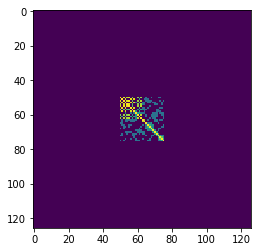

In [0]:
plt.figure()
plt.imshow(R_aff_mfcc)

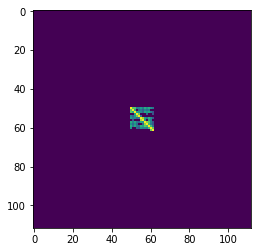

In [0]:
plt.figure()
plt.imshow(R_aff_chroma)